In [1]:
# run stopwatch
from _classes import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [2]:
%run _load.ipynb

In [3]:
economics_data = loadit(
    'economics_data', 'data/00-Datasets/'
)

In [4]:
dir = '006.1_SOL-Cost-of-living'

In [5]:
save_df = 'data/00-Datasets/'

In [6]:
save_excel = 'data/00-Excel-data/'

# <font color='#2C8B6D'>I. Население</font>

# Section III. Уровень жизни

## 6. Прожиточный минимум

### 6.1. Величина прожиточного минимума в целом по Российской Федерации и по субъектам Российской Федерации

*Источник: https://rosstat.gov.ru/folder/13397*  
*Единицы измерения: рубли*

*Примечания:*  
- *данные с 1992 по 1999 год - за IV квартал данного года*
- *данные с 2000 по 2020 год - из отдельного файла для РФ*
- *2000 год - данные по регионам отсутствуют*
- *Архангельская и Тюменская области - без АО*
- *Камчатский край - до 2007 - как сумма Камчатской области и Корякского АО*
- *Пермский край - до 2005 года - Пермская область*
- *Забайкальский край - до 2008 года как сумма Читинской области и Агинского Бурятского АО*

In [7]:
cost_of_living = pd.DataFrame(
    index=regions_names_list
)

In [8]:
cost_of_living

""
Российская Федерация
Алтайский край
Амурская область
Архангельская область
Астраханская область
...
Челябинская область
Чеченская Республика
Чувашская Республика
Чукотский автономный округ


In [9]:
drop_regions_list = [
    'Архангельская область',
    'Дальневосточный федеральный округ',
    'Приволжский федеральный округ',
    'Северо-Западный федеральный округ',
    'Северо-Кавказский федеральный округ',
    'Сибирский федеральный округ',
    'Уральский федеральный округ',
    'Центральный федеральный округ',
    'Южный федеральный округ',
    'Ямало-Ненецкий авт. округ',
    'Тюменская область',
    'в том числе:\nНенецкий авт. округ',
    'в том числе:\nХанты-Мансийский авт. округ - Югра',
    'Архангельская область',
    'Коми-Пермяцкий округ, входящий в состав Пермского края',
    'Крымский федеральный округ',
    'Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)',
    'Тюменская область',
    'Усть-Ордынский Бурятский округ',
    'Эвенкийский автономный округ (Красноярский край)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)',
    'Ямало-Ненецкий автономный округ (Тюменская область)',
    'Ненецкий автономный округ (Архангельская область)',
    'Южный федеральный округ (по 2009 год)',
    'Южный федеральный округ (с 2010 года)',
    'Южный федеральный округ (с 29.07.2016)',
]

In [10]:
replace_regions_dict_2020 = {
    'Архангельская область (кроме Ненецкого автономного округа)': 'Архангельская область',
    'Город Москва столица Российской Федерации город федерального значения': 'Москва',
    'Город Санкт-Петербург город федерального значения': 'Санкт-Петербург',
    'Город федерального значения Севастополь': 'Севастополь',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)': 'Тюменская область'
}

In [11]:
replace_regions_dict = {
    'Архангельская область без авт. округа': 'Архангельская область',
    'Тюменская область без авт. \nокругов': 'Тюменская область',
    'Тюменская область без авт. округов': 'Тюменская область',
    'Еврейская авт. область': 'Еврейская автономная область',
    'Кабардино-Балкарская Республика': 'Кабардино-Балкарская Республика',
    'Кемеровская область - Кузбасс': 'Кемеровская область',
    'Кемеровская область – Кузбасс': 'Кемеровская область',
    'Карачаево-Черкесская Республика': 'Карачаево-Черкесская Республика',
    'Республика Адыгея (Адыгея)': 'Республика Адыгея',
    'Республика Северная Осетия - Алания': 'Республика Северная Осетия-Алания',
    'Республика Татарстан (Татарстан)': 'Республика Татарстан',
    'Чувашская Республика - Чувашия': 'Чувашская Республика',
    'Чукотский авт. округ': 'Чукотский автономный округ',
    'г. Москва': 'Москва',
    'г. Санкт-Петербург': 'Санкт-Петербург',
    'г. Севастополь': 'Севастополь',
    'Псковская  область': 'Псковская область'
}

##### <font color='#AF4035'> 1992-2020 </font>

In [12]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'col_2020.xls')

In [13]:
col = pd.read_excel(col_link)

In [14]:
col

,Величина прожиточного минимума (рубль),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,NaN,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,...,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал,IV квартал
3,NaN,Все население,Все население,Все население,Все население,Все население,Все население,Все население,Все население,Все население,...,Все население,Все население,Все население,Все население,Все население,Все население,Все население,Все население,Все население,Все население
4,Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1285,...,6209,6705,7326,8234,9452,9691,9786,10213,10609,11329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Агинский Бурятский автономный округ,NaN,NaN,NaN,NaN,NaN,549390,759,1169,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Камчатская область,NaN,NaN,250000,623167,822867,853300,1167,1637,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Корякский автономный округ,NaN,NaN,NaN,NaN,NaN,1474867,1828,3545,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Пермская область,NaN,NaN,129184,291641,332745,347774,545,825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
col = col.drop([0, 2, 3], axis=0)

In [16]:
col = col.rename(columns={col.iloc[:, 0].name: 'Регион'})

In [17]:
col.iloc[0, 0] = 'Регион'

In [18]:
col['Регион'] = col['Регион'].apply(lambda x: str(x).strip())

In [19]:
col = col[~col['Регион'].isin(drop_regions_list)].copy()

In [20]:
# replace regions names
col['Регион'] = col['Регион'].replace(replace_regions_dict)

In [21]:
# replace regions names
col['Регион'] = col['Регион'].replace(replace_regions_dict_2020)

In [22]:
len(col['Регион'].sort_values().tolist())

89

In [23]:
set(col['Регион'].sort_values().tolist()) - set(regions_names_list)

{'Агинский Бурятский автономный округ',
 'Камчатская область',
 'Корякский автономный округ',
 'Пермская область',
 'Регион',
 'Республика Саха (Якутия)',
 'Читинская область'}

In [24]:
# make first row a column
col.columns = col.iloc[0, :]
col = col.drop(1, axis=0)

In [25]:
# make column as index
col = transform_column_as_index(data=col, iloc=0)
col.index.name = None
col.columns.name = None

In [26]:
# 'Камчасткий край' as sum of 'Камчатский край', 'Камчатская область', 'Корякский автономный округ'
kamch_list = ['Камчатский край', 'Камчатская область', 'Корякский автономный округ']
col.loc['Камчатский край'] = col.loc[kamch_list].sum(axis=0).values
col.loc['Камчатский край'] = col.loc['Камчатский край'].replace(0, np.NaN)
col = col.drop(kamch_list[1:], axis=0)

In [27]:
# 'Пермский край' as sum of 'Пермский край', 'Пермская область'
perm_list = ['Пермский край', 'Пермская область']
col.loc['Пермский край'] = col.loc[perm_list].sum(axis=0).values
col.loc['Пермский край'] = col.loc['Пермский край'].replace(0, np.NaN)
col = col.drop(perm_list[1:], axis=0)

In [28]:
# 'Забайкальский край' as sum of 'Забайкальский край', 'Читинская область', 'Агинский Бурятский автономный округ'
zabaik_list = [
    'Забайкальский край', 'Читинская область',
    'Агинский Бурятский автономный округ'
]
col.loc['Забайкальский край'] = col.loc[zabaik_list].sum(axis=0).values
col.loc['Забайкальский край'] = col.loc['Забайкальский край'].replace(0, np.NaN)
col = col.drop(zabaik_list[1:], axis=0)

In [29]:
# check regions names
set(col.index.sort_values().tolist()) - set(regions_names_list)

{'Республика Саха (Якутия)'}

In [30]:
cost_of_living = cost_of_living.join(col)

In [31]:
cost_of_living

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1285,1574,...,6209,6705,7326,8234,9452,9691,9786,10213,10609,11329
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,5943,6257,6561,7580,8785,8708,8657,9334,9704,10211
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,7950,8369,9251,9539,11555,11374,11203,11172,12379,13530
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,7722,8159,10243,11323,12880,10944,11380,11816,12334,13304
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,5378,5822,6271,7120,8236,8730,9040,9581,10114,10793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,NaN,NaN,117842,283665,312455,321427,541,776,NaN,1620,...,5552,6149,6936,7944,9038,8984,8962,9330,10038,11232
Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6600,6837,6301,6771,8508,8724,9995,10508,11035,11240
Чувашская Республика,NaN,NaN,89030,227901,292054,312380,520,809,NaN,1294,...,5247,5510,6049,6988,8071,8346,8236,8657,9285,9804
Чукотский автономный округ,NaN,NaN,NaN,819136,1242618,1392953,2072,3086,NaN,NaN,...,11428,12157,14766,13571,16845,17775,20149,21606,22098,23999


##### <font color='#AF4035'> 2000-2020 РФ </font>

In [32]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'urov_41kv.docx')

In [33]:
col = extract_table_from_docx(col_link)

In [34]:
col[0] = [i.strip() for i in col[0]]

In [35]:
years_range = range(2000, 2021)

In [36]:
years_range = [str(i) for i in years_range]

In [37]:
# take only values from column 0 that equals to values in 'years_range'
# and transform it to DF with transpose
col = col.loc[col[0].isin(years_range), :1].set_index(0).T

In [38]:
col

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,1210,1500,1808,2112,2376,3018,3422,3847,4593,5153,...,6369,6510,7306,8050,9701,9828,10088,10287,10890,11312


In [39]:
# change values for 2000+ columns in cost_of_living - make it equal as in 'col'
cost_of_living.loc['Российская Федерация', '2000':] = col.loc[1]

In [40]:
cost_of_living.head()

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1210,1500,...,6369,6510,7306,8050,9701,9828,10088,10287,10890,11312
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,5943,6257,6561,7580,8785,8708,8657,9334,9704,10211
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,7950,8369,9251,9539,11555,11374,11203,11172,12379,13530
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,7722,8159,10243,11323,12880,10944,11380,11816,12334,13304
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,5378,5822,6271,7120,8236,8730,9040,9581,10114,10793


##### <font color='#AF4035'> 2021 </font>

In [41]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'vpm _2021.docx')

In [42]:
col = extract_table_from_docx(col_link)

In [43]:
col = transform_cost_of_living(col, '2021', 2, 1, drop_regions_list, replace_regions_dict)

In [44]:
cost_of_living = cost_of_living.join(col)

In [45]:
cost_of_living

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1210,1500,...,6510,7306,8050,9701,9828,10088,10287,10890,11312,11653
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,6257,6561,7580,8785,8708,8657,9334,9704,10211,10665
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,8369,9251,9539,11555,11374,11203,11172,12379,13530,14017
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,8159,10243,11323,12880,10944,11380,11816,12334,13304,13857
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,5822,6271,7120,8236,8730,9040,9581,10114,10793,11069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,NaN,NaN,117842,283665,312455,321427,541,776,NaN,1620,...,6149,6936,7944,9038,8984,8962,9330,10038,11232,11430
Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6837,6301,6771,8508,8724,9995,10508,11035,11240,11240
Чувашская Республика,NaN,NaN,89030,227901,292054,312380,520,809,NaN,1294,...,5510,6049,6988,8071,8346,8236,8657,9285,9804,9804
Чукотский автономный округ,NaN,NaN,NaN,819136,1242618,1392953,2072,3086,NaN,NaN,...,12157,14766,13571,16845,17775,20149,21606,22098,23999,24164


##### <font color='#AF4035'> 2022 </font>

In [46]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'vpm_01-01-2022.docx')

In [47]:
col = extract_table_from_docx(col_link)

In [48]:
col = transform_cost_of_living(col, '2022', 2, 0, drop_regions_list, replace_regions_dict)

In [49]:
cost_of_living = cost_of_living.join(col)

In [50]:
cost_of_living

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1210,1500,...,7306,8050,9701,9828,10088,10287,10890,11312,11653,12654
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,6561,7580,8785,8708,8657,9334,9704,10211,10665,11262
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,9251,9539,11555,11374,11203,11172,12379,13530,14017,14704
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,10243,11323,12880,10944,11380,11816,12334,13304,13857,14679
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,6271,7120,8236,8730,9040,9581,10114,10793,11069,12274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,NaN,NaN,117842,283665,312455,321427,541,776,NaN,1620,...,6936,7944,9038,8984,8962,9330,10038,11232,11430,11887
Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6301,6771,8508,8724,9995,10508,11035,11240,11240,12148
Чувашская Республика,NaN,NaN,89030,227901,292054,312380,520,809,NaN,1294,...,6049,6988,8071,8346,8236,8657,9285,9804,9804,10756
Чукотский автономный округ,NaN,NaN,NaN,819136,1242618,1392953,2072,3086,NaN,NaN,...,14766,13571,16845,17775,20149,21606,22098,23999,24164,28851


##### <font color='#AF4035'> 2023 </font>

In [51]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'Vpm_2023.docx')

In [52]:
col = extract_table_from_docx(col_link)

In [53]:
col = transform_cost_of_living(col, '2023', 2, 5, drop_regions_list, replace_regions_dict)

In [54]:
cost_of_living = cost_of_living.join(col)

In [55]:
cost_of_living

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1210,1500,...,8050,9701,9828,10088,10287,10890,11312,11653,12654,14375
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,7580,8785,8708,8657,9334,9704,10211,10665,11262,12794
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,9539,11555,11374,11203,11172,12379,13530,14017,14704,17047
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,11323,12880,10944,11380,11816,12334,13304,13857,14679,16675
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,7120,8236,8730,9040,9581,10114,10793,11069,12274,13944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,NaN,NaN,117842,283665,312455,321427,541,776,NaN,1620,...,7944,9038,8984,8962,9330,10038,11232,11430,11887,13730
Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6771,8508,8724,9995,10508,11035,11240,11240,12148,13800
Чувашская Республика,NaN,NaN,89030,227901,292054,312380,520,809,NaN,1294,...,6988,8071,8346,8236,8657,9285,9804,9804,10756,12363
Чукотский автономный округ,NaN,NaN,NaN,819136,1242618,1392953,2072,3086,NaN,NaN,...,13571,16845,17775,20149,21606,22098,23999,24164,28851,35938


##### <font color='#AF4035'> 2024 </font>

In [56]:
col_link = \
    ('data/02-Population/02-Standard-of-living/04-Cost-of-living/'
     'VPM_2024.docx')

In [57]:
col = extract_table_from_docx(col_link)

In [58]:
col = transform_cost_of_living(col, '2024', 3, 3, drop_regions_list, replace_regions_dict)

In [59]:
cost_of_living = cost_of_living.join(col)

In [60]:
cost_of_living

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Российская Федерация,3384,37703,124078,312740,371097,408527,636,944,1210,1500,...,9701,9828,10088,10287,10890,11312,11653,12654,14375,NaN
Алтайский край,NaN,NaN,97895,275057,322423,365954,556,768,NaN,1339,...,8785,8708,8657,9334,9704,10211,10665,11262,12794,13753
Амурская область,NaN,NaN,177788,357618,444412,475316,775,1065,NaN,1889,...,11555,11374,11203,11172,12379,13530,14017,14704,17047,17823
Архангельская область,NaN,NaN,150633,389662,439658,461184,771,1102,NaN,1806,...,12880,10944,11380,11816,12334,13304,13857,14679,16675,17695
Астраханская область,NaN,NaN,104795,294303,355603,349376,595,845,NaN,1585,...,8236,8730,9040,9581,10114,10793,11069,12274,13944,14796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Челябинская область,NaN,NaN,117842,283665,312455,321427,541,776,NaN,1620,...,9038,8984,8962,9330,10038,11232,11430,11887,13730,14279
Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8508,8724,9995,10508,11035,11240,11240,12148,13800,14644
Чувашская Республика,NaN,NaN,89030,227901,292054,312380,520,809,NaN,1294,...,8071,8346,8236,8657,9285,9804,9804,10756,12363,13271
Чукотский автономный округ,NaN,NaN,NaN,819136,1242618,1392953,2072,3086,NaN,NaN,...,16845,17775,20149,21606,22098,23999,24164,28851,35938,39813


In [61]:
cost_of_living = cost_of_living.applymap(replace_comma_point)

In [62]:
cost_of_living = cost_of_living.astype(float)

In [63]:
# consider 1998 redenomination
cost_of_living.loc[:, :'1997']  = cost_of_living.loc[:, :'1997'] / 1000

In [64]:
cost_of_living = transform_round(cost_of_living, 0)

In [65]:
cost_of_living.columns = cost_of_living.columns.astype(int)

In [66]:
cost_of_living = cost_of_living.T.copy()

##### <font color='#2A5899'> Check for Discrepancy: Cost of living </font>

In [67]:
cost_of_living.isna().any().any()

True

##### <font color='#2A5899'> Final Results: Cost of living </font>

In [68]:
cost_of_living

,Российская Федерация,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Хабаровский край,Челябинская область,Чеченская Республика,Чувашская Республика,Чукотский автономный округ,Ярославская область
1992,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,124.0,98.0,178.0,151.0,105.0,92.0,90.0,103.0,105.0,126.0,...,103.0,180.0,116.0,66.0,182.0,118.0,NaN,89.0,NaN,101.0
1995,313.0,275.0,358.0,390.0,294.0,220.0,238.0,265.0,279.0,317.0,...,250.0,454.0,309.0,176.0,435.0,284.0,NaN,228.0,819.0,258.0
1996,371.0,322.0,444.0,440.0,356.0,282.0,250.0,308.0,311.0,359.0,...,273.0,530.0,386.0,210.0,453.0,312.0,NaN,292.0,1243.0,309.0
1997,409.0,366.0,475.0,461.0,349.0,316.0,287.0,339.0,334.0,390.0,...,304.0,572.0,400.0,257.0,495.0,321.0,NaN,312.0,1393.0,342.0
1998,636.0,556.0,775.0,771.0,595.0,437.0,449.0,501.0,564.0,626.0,...,509.0,720.0,569.0,382.0,750.0,541.0,NaN,520.0,2072.0,552.0
1999,944.0,768.0,1065.0,1102.0,845.0,716.0,726.0,800.0,910.0,924.0,...,818.0,1127.0,910.0,609.0,1016.0,776.0,NaN,809.0,3086.0,795.0
2000,1210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,1500.0,1339.0,1889.0,1806.0,1585.0,NaN,1258.0,1328.0,NaN,NaN,...,1273.0,NaN,1383.0,1367.0,NaN,1620.0,NaN,1294.0,NaN,NaN


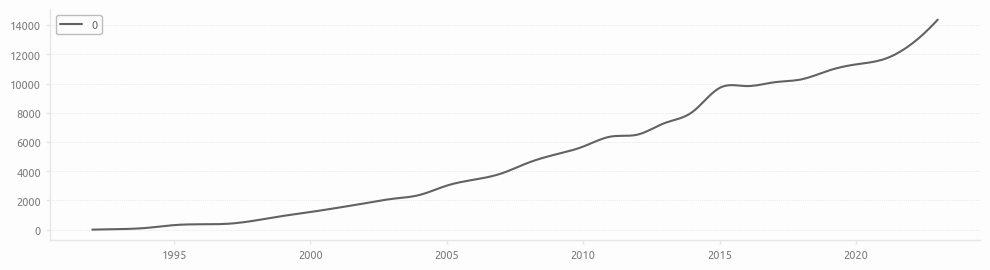

In [69]:
plt.figure(figsize=(12, 3))
sns.lineplot(smoothed(cost_of_living.iloc[:-1, 0], return_type='df'));

##### <font color='#AF4035'> Export Dataset to Excel

In [70]:
saveit_excel(
    data=cost_of_living,
    filename=dir,
    path=save_excel,
    sheet='Прожиточный минимум (РФ)'
)

'Прожиточный минимум (РФ)' sheet created if file '010204-SOL-Cost-of-living.xlsx'


### Save Dataset

In [71]:
economics_data['6.1'] = cost_of_living

In [72]:
saveit(
    file=economics_data,
    name='economics_data',
    dir=save_df
)

File 'economics_data' saved in directory 'data/00-Datasets/'


### Save Session

In [73]:
save_session(dir)

### Execution time

In [74]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:37
